# Project: Identifying Spammers on Social Networks

# Building a Graph for Gephi

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
from matplotlib import pyplot as plt
import networkx as nx
%matplotlib inline

# Reading the filtered data

In this section we just read the filtered data, that was given to us by TA. Than we create the adjacency matrix from it. 

In [3]:
data_folder = "./data/"
relations = pd.read_csv(data_folder+'filtered_relations.csv')
users = pd.read_csv(data_folder+'filtered_users.csv')

## Creating the Adjacency Matrix from the DataFrame

In [4]:
#Cleaning up the nodes
nodes = users[['User Id', "Time", "Gender", "Age Range", "Spammer Label"]]
num_nodes = len(nodes)
nodes.reset_index(level=0, inplace=True)
nodes = nodes.rename(columns={'index':'node_idx'})
nodes.head()

,node_idx,User Id,Time,Gender,Age Range,Spammer Label
0,0,1,0.9000,M,30,0
1,1,190,0.2000,M,50,0
2,2,270,0.2625,M,30,0
3,3,319,0.0000,M,30,0
4,4,407,0.0500,M,50,0


In [5]:
#Define Edges
edges = relations[["src", "dst", "relation"]]
num_edges = len(edges)
edges.head()

,src,dst,relation
0,1,3993630,5
1,1,3181660,5
2,1,1582548,5
3,1,5208994,5
4,1,2330216,5


In [6]:
# Create a conversion table from User Id to node index.
uid2idx = nodes[['node_idx', 'User Id']]
uid2idx = uid2idx.set_index('User Id')
uid2idx.index.name = 'src'
uid2idx.head()

,node_idx
src,
1,0
190,1
270,2
319,3
407,4


In [7]:
# Add a new column, matching the "src" column with the node_idx.
# Do the same with the "dst" column.
edges = edges.join(uid2idx, on="src")
edges = edges.join(uid2idx, on='dst', rsuffix='_dst')
edges.head()

,src,dst,relation,node_idx,node_idx_dst
0,1,3993630,5,0,44200
1,1,3181660,5,0,35227
2,1,1582548,5,0,17727
3,1,5208994,5,0,57804
4,1,2330216,5,0,25958


In [8]:
# Drop the src, dst.
edges = edges.drop(columns=['src','dst'])

In [9]:
# We build the adjacency matrix with int8 in order to save on memory resources. 
adjacency = np.zeros((num_nodes, num_nodes), dtype = np.dtype('>i1'))
for idx, row in edges.iterrows():
    i, j = int(row.node_idx), int(row.node_idx_dst)
    adjacency[i, j] = 1
n_nodes = num_nodes

## Creation and Visualization of the Graph

In [10]:
# Creation of a graph from the adjacency matrix
graph = nx.from_numpy_array(adjacency)

In [11]:
#Transofrm to dictionary
node_props = nodes.to_dict()

In [13]:
#Adding attributes to the nodes
for key in node_props:
    nx.set_node_attributes(graph, node_props[key], key)

In [14]:
graph.node[1]

{'node_idx': 1,
 'User Id': 190,
 'Time': 0.2,
 'Gender': 'M',
 'Age Range': 50,
 'Spammer Label': 0}

/Users/ilijagjorgjiev/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


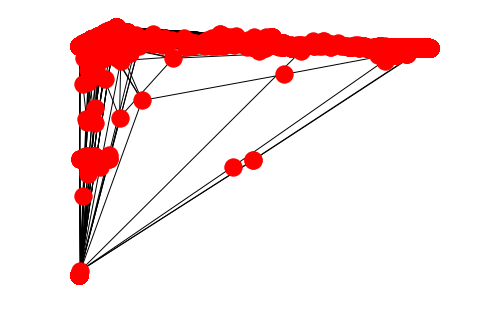

In [15]:
#Draw the Spectral Graph
nx.draw_spectral(graph)

In [21]:
#Save the Graph in GEXF Format, to be explored in Gephi
nx.write_gexf(graph,'spammers.gexf')